# Setup

In [9]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
plt.style.use("ggplot")
sns.set(font_scale=1.1)

# Reproducibility
np.random.seed(42)

# Display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Merged Flow Comparison Data

In [10]:
merged_df = pd.read_csv("../data/merged_flow_comparison.csv", parse_dates=["date"])

# Preview the data
merged_df.head()

,ticker_id,provider,date,inflow_internal,outflow_internal,net_flow_internal,inflow_mstar,outflow_mstar,net_flow_mstar,inflow_bbg,outflow_bbg,net_flow_bbg,inflow_abs_diff_mstar,inflow_rel_diff_mstar,outflow_abs_diff_mstar,outflow_rel_diff_mstar,net_flow_abs_diff_mstar,net_flow_rel_diff_mstar,inflow_abs_diff_bbg,inflow_rel_diff_bbg,outflow_abs_diff_bbg,outflow_rel_diff_bbg,net_flow_abs_diff_bbg,net_flow_rel_diff_bbg
0,SPY,BlackRock,2024-01-01,4753571.53,3659969.71,1093601.82,11902784.57,4155114.78,7747669.79,6918692.33,6401157.75,517534.58,7149213.04,1.5040,495145.07,0.1353,6654067.97,6.0845,2165120.80,0.4555,2741188.04,0.7490,576067.24,0.5268
1,SPY,BlackRock,2024-01-02,779972.60,290418.06,489554.54,2272582.03,1589703.20,682878.83,3645319.86,2660565.26,984754.60,1492609.43,1.9137,1299285.14,4.4738,193324.29,0.3949,2865347.26,3.6737,2370147.20,8.1612,495200.06,1.0115
2,SPY,BlackRock,2024-01-03,4330880.73,3005575.06,1325305.67,5941222.65,4504298.31,1436924.34,4862291.63,3170691.04,1691600.59,1610341.92,0.3718,1498723.25,0.4986,111618.67,0.0842,531410.90,0.1227,165115.98,0.0549,366294.92,0.2764
3,SPY,BlackRock,2024-01-04,917022.55,1521211.21,-604188.66,1861701.12,2663434.89,-801733.77,2415634.82,2728722.10,-313087.28,944678.57,1.0302,1142223.68,0.7509,197545.11,-0.3270,1498612.27,1.6342,1207510.89,0.7938,291101.38,-0.4818
4,SPY,BlackRock,2024-01-05,2623782.16,2159725.09,464057.07,10253365.26,3792205.02,6461160.24,3843328.86,7761229.19,-3917900.33,7629583.10,2.9079,1632479.93,0.7559,5997103.17,12.9232,1219546.70,0.4648,5601504.10,2.5936,4381957.40,9.4427


# Flag and Rank Discrepancies

In [11]:
threshold = 0.10  # 10%

# Add boolean flags
for source in ["mstar", "bbg"]:
    for metric in ["inflow", "outflow", "net_flow"]:
        rel_col = f"{metric}_rel_diff_{source}"
        flag_col = f"{metric}_flag_{source}"
        merged_df[flag_col] = merged_df[rel_col] > threshold

# Count flags per row (how many metrics are out of spec)
merged_df["num_flags_mstar"] = merged_df[[f"{m}_flag_mstar" for m in ["inflow", "outflow", "net_flow"]]].sum(axis=1)
merged_df["num_flags_bbg"] = merged_df[[f"{m}_flag_bbg" for m in ["inflow", "outflow", "net_flow"]]].sum(axis=1)

# Preview rows with highest number of Morningstar flags
merged_df.sort_values("num_flags_mstar", ascending=False).head()

,ticker_id,provider,date,inflow_internal,outflow_internal,net_flow_internal,inflow_mstar,outflow_mstar,net_flow_mstar,inflow_bbg,outflow_bbg,net_flow_bbg,inflow_abs_diff_mstar,inflow_rel_diff_mstar,outflow_abs_diff_mstar,outflow_rel_diff_mstar,net_flow_abs_diff_mstar,net_flow_rel_diff_mstar,inflow_abs_diff_bbg,inflow_rel_diff_bbg,outflow_abs_diff_bbg,outflow_rel_diff_bbg,net_flow_abs_diff_bbg,net_flow_rel_diff_bbg,inflow_flag_mstar,outflow_flag_mstar,net_flow_flag_mstar,inflow_flag_bbg,outflow_flag_bbg,net_flow_flag_bbg,num_flags_mstar,num_flags_bbg
0,SPY,BlackRock,2024-01-01,4753571.53,3659969.71,1093601.82,11902784.57,4155114.78,7747669.79,6918692.33,6401157.75,517534.58,7149213.04,1.5040,495145.07,0.1353,6654067.97,6.0845,2165120.80,0.4555,2741188.04,0.7490,576067.24,0.5268,True,True,True,True,True,True,3,3
28785,PFE,BlackRock,2024-08-25,4893085.52,4156462.99,736622.53,7757956.59,10901478.99,-3143522.40,6249951.15,5720575.33,529375.82,2864871.07,0.5855,6745016.00,1.6228,3880144.93,5.2675,1356865.63,0.2773,1564112.34,0.3763,207246.71,0.2813,True,True,True,True,True,True,3,3
28781,PFE,BlackRock,2024-08-21,304384.93,168347.08,136037.85,3310385.00,3264188.84,46196.16,7212508.57,1654837.72,5557670.85,3006000.07,9.8757,3095841.76,18.3896,89841.69,0.6604,6908123.64,22.6954,1486490.64,8.8299,5421633.00,39.8539,True,True,True,True,True,True,3,3
28779,PFE,BlackRock,2024-08-19,4895902.73,4050228.40,845674.33,6583915.06,9538651.89,-2954736.83,8223890.17,4480144.72,3743745.45,1688012.33,0.3448,5488423.49,1.3551,3800411.16,4.4939,3327987.44,0.6797,429916.32,0.1061,2898071.12,3.4269,True,True,True,True,True,True,3,3
28777,PFE,BlackRock,2024-08-17,2556219.30,2021415.92,534803.38,6960371.92,2852670.74,4107701.18,4263926.32,6198242.59,-1934316.27,4404152.62,1.7229,831254.82,0.4112,3572897.80,6.6808,1707707.02,0.6681,4176826.67,2.0663,2469119.65,4.6169,True,True,True,True,True,True,3,3


# Visualize Discrepancies by Provider

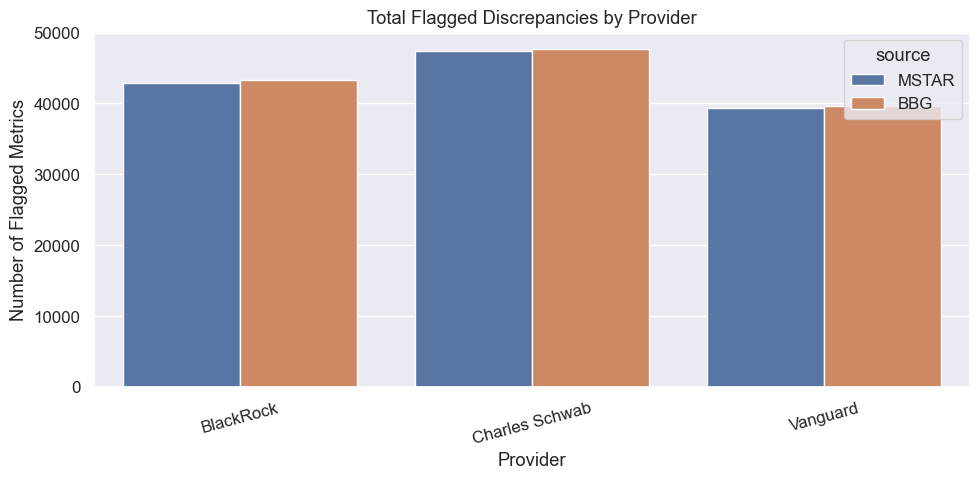

In [12]:
# Sum flag counts per provider
flag_summary = merged_df.groupby("provider")[["num_flags_mstar", "num_flags_bbg"]].sum().reset_index()

# Rename for plotting
flag_summary = flag_summary.melt(id_vars="provider", var_name="source", value_name="flag_count")
flag_summary["source"] = flag_summary["source"].str.replace("num_flags_", "").str.upper()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=flag_summary, x="provider", y="flag_count", hue="source")
plt.title("Total Flagged Discrepancies by Provider")
plt.ylabel("Number of Flagged Metrics")
plt.xlabel("Provider")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Export Flagged Dependencies

In [13]:
# Filter for rows where either source has any flags
flagged_rows = merged_df[
    (merged_df["num_flags_mstar"] > 0) | (merged_df["num_flags_bbg"] > 0)
].copy()

# Optional: keep a tidy set of columns
flagged_export = flagged_rows[[
    "ticker_id", "provider", "date",
    "net_flow_internal", "net_flow_mstar", "net_flow_bbg",
    "net_flow_rel_diff_mstar", "net_flow_rel_diff_bbg",
    "num_flags_mstar", "num_flags_bbg"
]]

# Save to CSV
flagged_path = "../data/flagged_discrepancy_rows.csv"
flagged_export.to_csv(flagged_path, index=False)

flagged_path

'../data/flagged_discrepancy_rows.csv'